# Lab 3_3

## 3. An experiment with PCA
For this problem, we’ll be using the animals with attributes data set. Go to

                            http://attributes.kyb.tuebingen.mpg.de
                            
and, under “Downloads”, choose the “base package” (the very first file in the list). Unzip it and look over the various text files.

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
from pandas import read_fwf
from matplotlib.pyplot import figure
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
import graphviz
from sklearn import tree
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from gensim.models import Word2Vec
from sklearn.decomposition import PCA
from matplotlib import pyplot
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from pylab import rcParams
import sys

if not sys.warnoptions:
    import warnings
    warnings.simplefilter("ignore")

## (a) This is a small data set that has information about 50 animals. The animals are listed in classes.txt. For each animal, the information consists of values for 85 features: does the animal have a tail, is it slow, does it have tusks, etc. The details of the features are in predicates.txt. The full data consists of a 50 × 85 matrix of real values, in predicate-matrix-continuous.txt. Load this real-valued array.

In [2]:
data = read_fwf('predicate-matrix-continuous.txt', header = None, sep = '\t')
classes = read_fwf('classes.txt', header = None, sep = '\t')

## (b) We would like to visualize these animals in 2-d. Show how to do this with a PCA projection from R85 to R2. Show the position of each animal, and label them with their names.

## Python notes: You will need to make the plot larger by prefacing your code with
    from pylab import rcParams
    rcParams[’figure.figsize’] = 10, 10
## (or try a different size if this doesn’t seem right).

In [3]:
x = StandardScaler().fit_transform(data)

In [4]:
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])

In [5]:
finalDf = pd.concat([principalDf, classes], axis = 1)

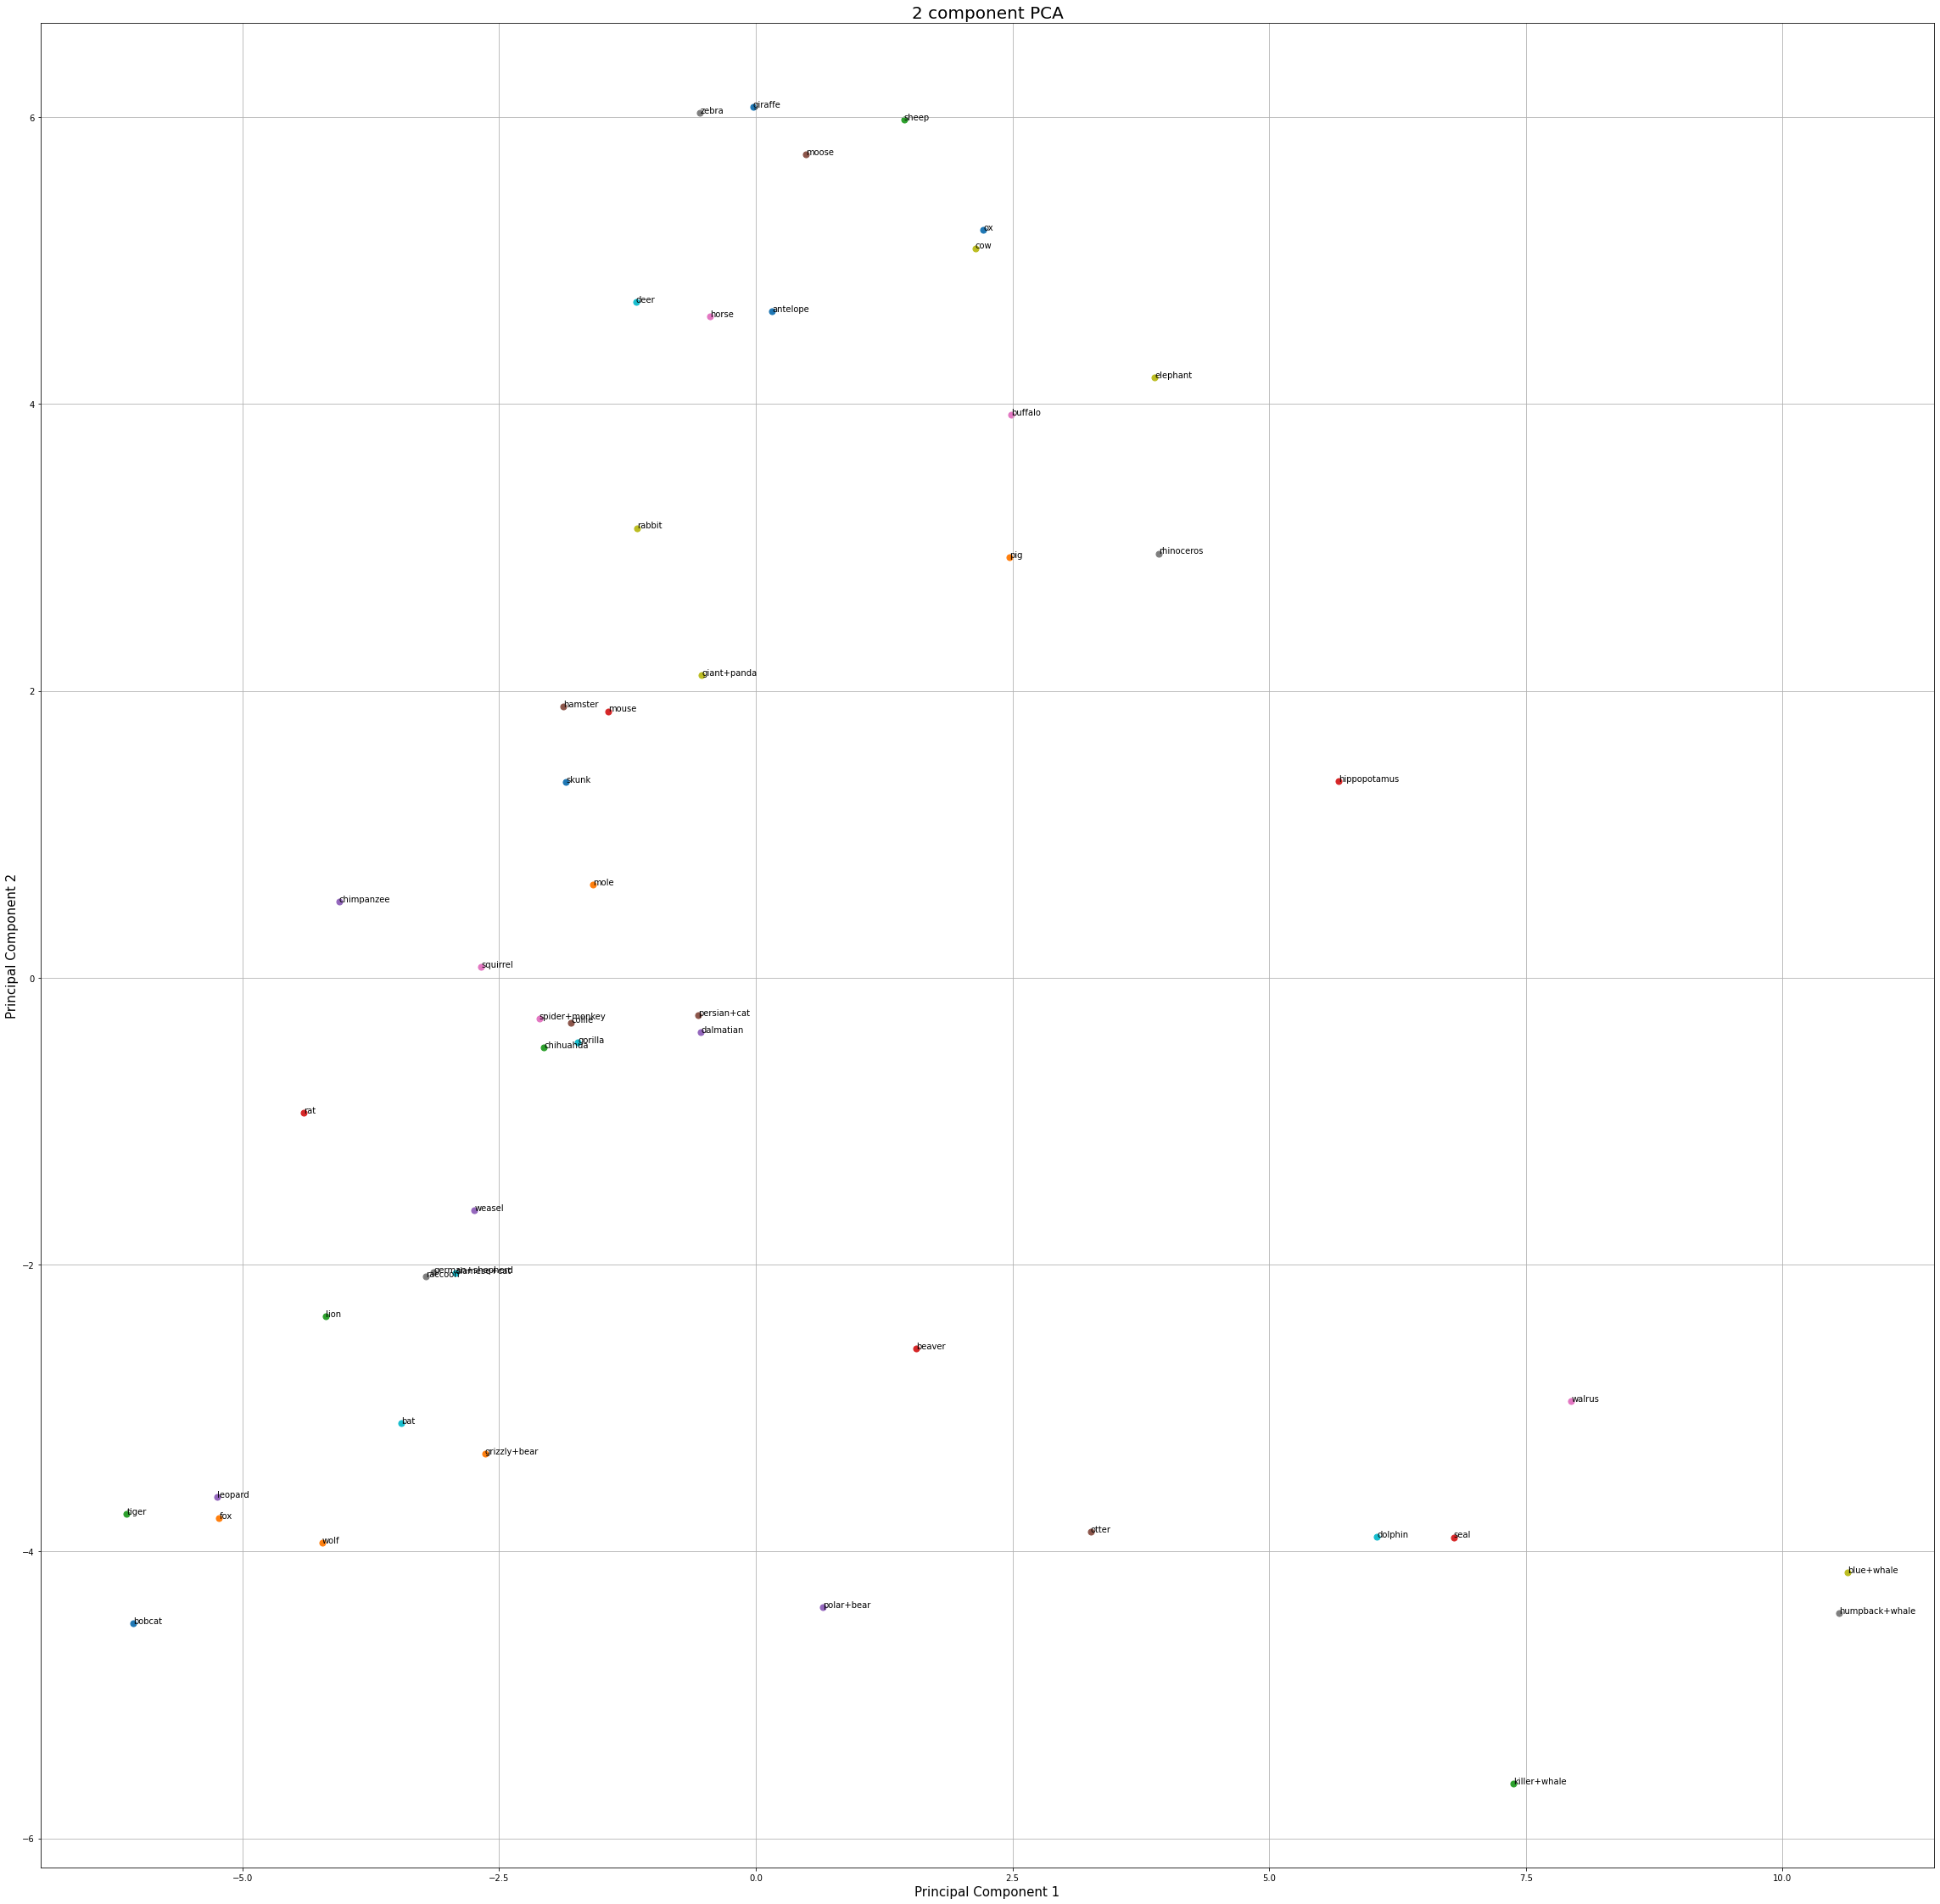

In [7]:
fig = plt.figure()
rcParams['figure.figsize'] = 40, 40
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = finalDf.values[:,3]
for target in zip(targets):
    indicesToKeep = finalDf.values[:,3] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , s = 50)

#ax.legend(targets)
ax.grid()

words = finalDf.values[:,3]
for i, word in enumerate(words):
    pyplot.annotate(word, xy=(finalDf.loc[i, 'principal component 1']
               , finalDf.loc[i, 'principal component 2']))
pyplot.show()